<a href="https://colab.research.google.com/github/Cyber-Dust/Enterprise-Data-Analytics/blob/main/Volk_TH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# PYTHON MODULES
!pip install pandas_bokeh
# import user-installed modules
import pandas as pd
import pandas_bokeh
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt


# pandas options
pd.set_option('display.max_rows', 100)
pd.set_option('plotting.backend', 'pandas_bokeh')
pandas_bokeh.output_notebook()

In [2]:
!wget -nc 'https://raw.githubusercontent.com/Cyber-Dust/Enterprise-Data-Analytics/main/F2023_StudentSurvey.v2.csv'
student_data= pd.read_csv('F2023_StudentSurvey.v2.csv',header=None)

File ‘F2023_StudentSurvey.v2.csv’ already there; not retrieving.



In [3]:
student_data.shape

(78, 44)

In [4]:
student_data.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,16 Personality Type Results,Major_1,Major_2,Minor_1,Minor_2,PDP_Status,Grad_Year,Class_Standing,GPA,Semester_Units,...,Zip_Code_US,Is_California_Home,Languages_Spoken,News_Source,Loves_to_Travel,Foodie,Purchase_Based_On_Sustainability,Reusable_Water_Bottle,Meals_Delivery_Service_Percent,Ride_Share_Percent
1,ISFJ-T,Business Administration,Accounting,Applied Analytics,NaN,No,2025,Junior,3.88,20,...,NaN,No,2,Youtube,Yes,Yes,No,Yes,50%,100%
2,INTJ-T,Communication,NaN,Applied Analytics,NaN,Yes,2024,Senior,3.95,17,...,NaN,No,3,"News Sites. (e.g. Wall Street Journal,Other",Yes,Yes,No,Yes,0%,0%
3,ISTJ-T,Business Administration,NaN,Applied Analytics,NaN,No,2024,Senior,3.94,20,...,95148,Yes,2,"Twitter,Tiktok,TV,Youtube,News Sites. (e.g. Wa...",Yes,Yes,No,Yes,0%,0%
4,ENFJ-A,Accounting,NaN,Data Science,NaN,No,2024,Senior,3.56,17,...,94568,Yes,2,"Instagram,News Sites. (e.g. Wall Street Journal",Yes,Yes,Yes,Yes,0%,0%


In [5]:
student_data_raw = student_data.copy(deep=True)

In [6]:
student_data.columns = student_data.iloc[0] # Set the first row as column names
student_data = student_data[1:] # Remove the first row since it's now redundant

In [7]:
#rename first column to "personalitytype"
student_data.rename(columns={'16 Personality Type Results': 'Personality_Type'}, inplace=True)

<ipython-input-7-17486c69a118>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_data.rename(columns={'16 Personality Type Results': 'Personality_Type'}, inplace=True)


In [8]:
# clean the happiness income log
print("Shape before dropping duplicates and unneeded columns: ")
print(student_data.shape)
#drop duplicates
student_data = student_data.drop_duplicates()
#drop null
student_data = student_data.dropna(axis=1, how='all')
print("Shape after dropping duplicates and unneeded columns: ")
print(student_data.shape)

Shape before dropping duplicates and unneeded columns: 
(77, 44)
Shape after dropping duplicates and unneeded columns: 
(77, 44)


In [9]:
#Isolate the variables of interest: ‘Personality_Type’, ‘Grad_Year’, ‘GPA’, ‘Sex’, ‘Overall_USC_Exp’, ‘Merit_Scholarship_Percent’, ’Age’ and ‘USC_Social_Exp’ into a new data frame.
df = student_data[['Personality_Type', 'Grad_Year', 'GPA', 'Sex', 'Overall_USC_Exp', 'Merit_Scholarship_Percent', 'Age','USC_Social_Exp']]
df.head()

,Personality_Type,Grad_Year,GPA,Sex,Overall_USC_Exp,Merit_Scholarship_Percent,Age,USC_Social_Exp
1,ISFJ-T,2025,3.88,Female,5,0%,21,4
2,INTJ-T,2024,3.95,Male,4,25%,23,4
3,ISTJ-T,2024,3.94,Female,3,0%,20,3
4,ENFJ-A,2024,3.56,Male,4,0%,22,4
5,INTP-T,2025,3.92,Female,3,0%,20,3


In [10]:
df['E/I'] = student_data['Personality_Type'].str[0]

<ipython-input-10-90442ca85f12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['E/I'] = student_data['Personality_Type'].str[0]


In [11]:
df.head()

,Personality_Type,Grad_Year,GPA,Sex,Overall_USC_Exp,Merit_Scholarship_Percent,Age,USC_Social_Exp,E/I
1,ISFJ-T,2025,3.88,Female,5,0%,21,4,I
2,INTJ-T,2024,3.95,Male,4,25%,23,4,I
3,ISTJ-T,2024,3.94,Female,3,0%,20,3,I
4,ENFJ-A,2024,3.56,Male,4,0%,22,4,E
5,INTP-T,2025,3.92,Female,3,0%,20,3,I


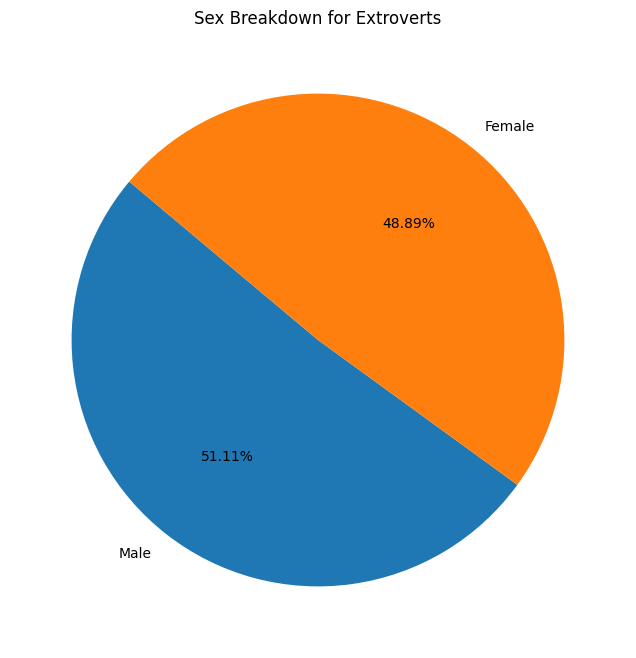

In [12]:
# Pie Chart
fig, ax = plt.subplots(figsize=(14, 8), dpi=100)

# Set title
plt.title(label='Sex Breakdown for Extroverts')

# Create pie chart
personality_counts = df[df['E/I'] == 'E']['Sex'].value_counts()
plt.pie(x=personality_counts, labels=personality_counts.index, autopct='%1.2f%%', startangle=140)

plt.show()

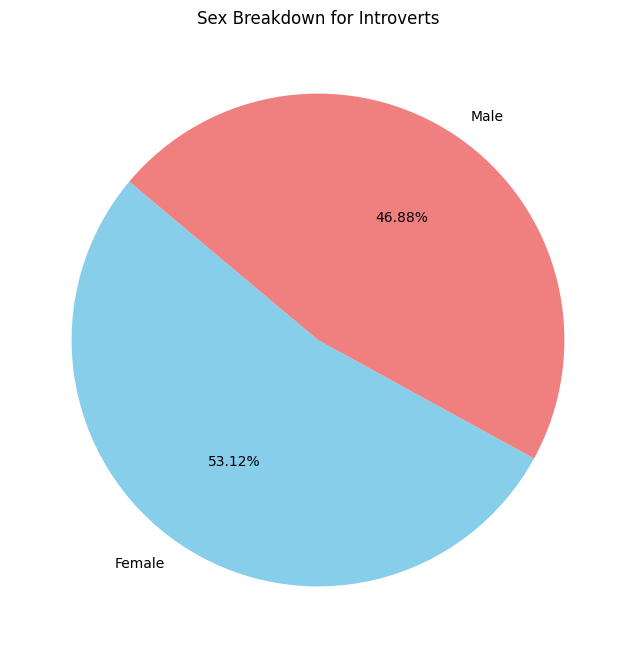

In [13]:
# Pie Chart
fig, ax = plt.subplots(figsize=(14, 8), dpi=100)

# Set title
plt.title(label='Sex Breakdown for Introverts')

# Custom colors
custom_colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

# Create pie chart
sex_counts = df[df['E/I'] == 'I']['Sex'].value_counts()
plt.pie(x=sex_counts, labels=sex_counts.index, autopct='%1.2f%%', startangle=140, colors=custom_colors)

plt.show()

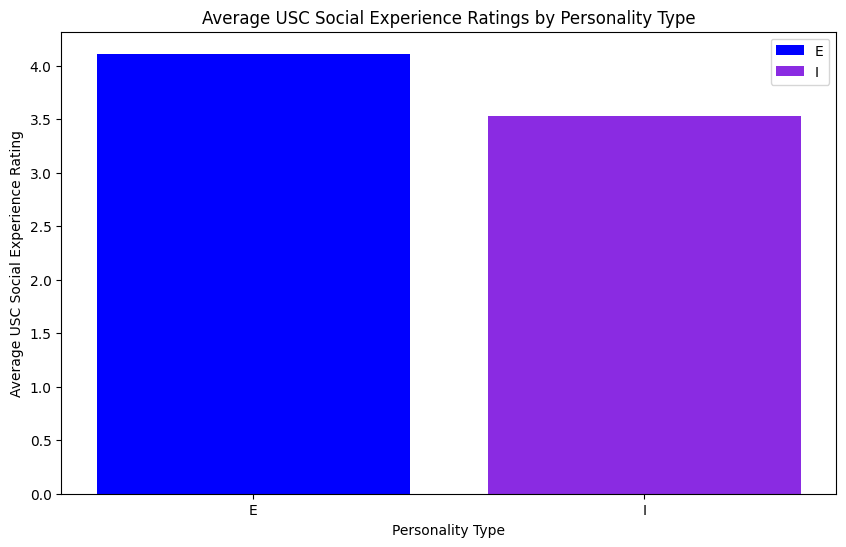

In [251]:
# Filter data for 'E' and 'I'
df_e = df[df['E/I'] == 'E']
df_i = df[df['E/I'] == 'I']

# Plotting
plt.figure(figsize=(10, 6))

# Plot 'E'
plt.bar('E', df_e['USC_Social_Exp'].mean(), color='blue', label='E')

# Plot 'I'
plt.bar('I', df_i['USC_Social_Exp'].mean(), color='blueviolet', label='I')

# Set title and labels
plt.title('Average USC Social Experience Ratings by Personality Type')
plt.xlabel('Personality Type')
plt.ylabel('Average USC Social Experience Rating')

# Show legend
plt.legend()

# Show the plot
plt.show()

In [248]:
# # Histogram
# # sets size of figure
# fig, ax = plt.subplots(figsize=(10,8), dpi=100)
# chart3 = df['E/I']
# # set title and axis labels
# plt.title(label='Distribution of age of passengers on Titanic')
# plt.xlabel('E/I')
# plt.ylabel('Number of Ratings')
# # write code to create histogram here

# plt.hist(x=chart3, bins=2, color='green', rwidth=.9)

# plt.show()

In [227]:
pip install seaborn

<ipython-input-238-04511bd8a4cb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['USC_Social_Exp'] = pd.to_numeric(df['USC_Social_Exp'], errors='coerce')
<ipython-input-238-04511bd8a4cb>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='E/I', y='USC_Social_Exp', hue='E/I', data=df, orient='v', ci=None, palette='viridis')


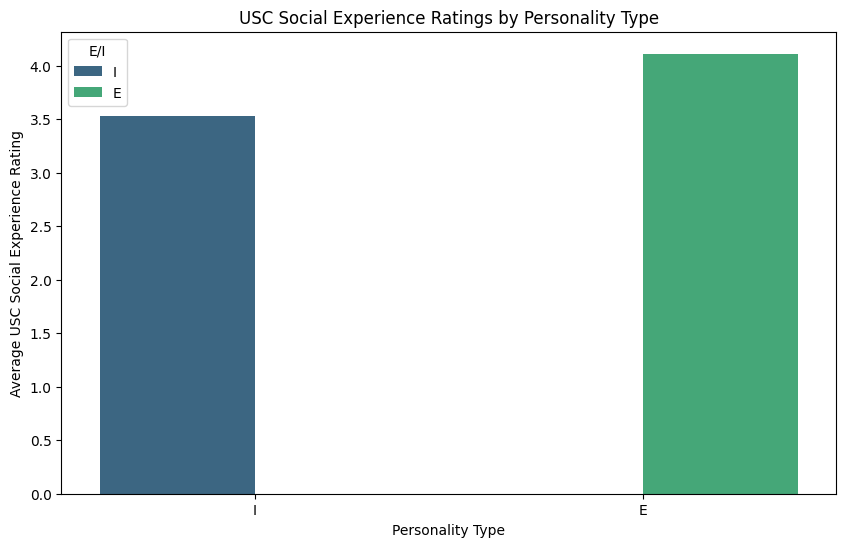

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt
# Convert 'USC_Social_Exp' to numeric
df['USC_Social_Exp'] = pd.to_numeric(df['USC_Social_Exp'], errors='coerce')
# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='E/I', y='USC_Social_Exp', hue='E/I', data=df, orient='v', ci=None, palette='viridis')
# Set title and labels
plt.title('USC Social Experience Ratings by Personality Type')
plt.ylabel('Average USC Social Experience Rating')
plt.xlabel('Personality Type')
# Show the plot
plt.show()

In [171]:
df2 = student_data[['Age', 'GPA']]
# print(df2)

In [33]:
df2.corr(method ='pearson', numeric_only=False) #

,Age,GPA
0,,
Age,1.000000,-0.009422
GPA,-0.009422,1.000000


# DATA MART 1:
 A data mart which only contains data from students who are graduating in 2024 and whose GPA is in between 3.3-3.6.

In [166]:
# Convert 'Grad_Year' to numeric
student_data['Grad_Year'] = student_data['Grad_Year'].astype(int)

# Define conditions for at least 50% merit scholarship and graduation year 2024
gpa_condition = (student_data['GPA'] >= 3.30) & (student_data['GPA'] <= 3.60)
grad_condition = student_data['Grad_Year'] == 2024

# Combine conditions using the "&" operator
data_mart1 = student_data[gpa_condition & grad_condition].copy(deep=True)

# Display the resulting Data Mart 1
print(data_mart1[['Grad_Year', 'GPA']])

data_mart1.head()

0   Grad_Year   GPA
4        2024  3.56
6        2024  3.47
14       2024  3.44
15       2024  3.40
16       2024  3.59
23       2024  3.54
24       2024  3.60
26       2024  3.58
30       2024  3.60
31       2024  3.55
33       2024  3.40
40       2024  3.47
43       2024  3.60
47       2024  3.42
54       2024  3.48
62       2024  3.30
67       2024  3.51
72       2024  3.50
74       2024  3.50


,Personality_Type,Major_1,Major_2,Minor_1,Minor_2,PDP_Status,Grad_Year,Class_Standing,GPA,Semester_Units,...,Zip_Code_US,Is_California_Home,Languages_Spoken,News_Source,Loves_to_Travel,Foodie,Purchase_Based_On_Sustainability,Reusable_Water_Bottle,Meals_Delivery_Service_Percent,Ride_Share_Percent
4,ENFJ-A,Accounting,NaN,Data Science,NaN,No,2024,Senior,3.56,17,...,94568,Yes,2,"Instagram,News Sites. (e.g. Wall Street Journal",Yes,Yes,Yes,Yes,0%,0%
6,ESTJ-A,Cognitive Science,NaN,Applied Analytics,NaN,No,2024,Senior,3.47,16,...,90007,Yes,2,"Instagram,Twitter,Tiktok",Yes,No,No,Yes,0%,0%
14,INTP-A,Economics,NaN,Applied Analytics,NaN,No,2024,Senior,3.44,16,...,60637,No,1,"Instagram,TV,Youtube,News Sites. (e.g. Wall St...",Yes,Yes,Yes,No,75%,25%
15,ESTJ-A,Business Administration,NaN,Applied Analytics,NaN,Yes,2024,Senior,3.40,15,...,94568,Yes,4,Instagram,Yes,Yes,Yes,Yes,25%,25%
16,ESFJ-A,Business Administration,NaN,Applied Analytics,NaN,No,2024,Senior,3.59,18,...,90275,Yes,2,"Instagram,Snapchat,Youtube,News Sites. (e.g. W...",Yes,No,Yes,Yes,0%,25%


In [170]:
#test mart
high = (student_data['GPA'] >= 3.3) & (student_data['GPA'] <= 3.6)
student_data.loc[high, ['GPA', 'Loves_to_Travel', 'Grad_Year']]


,GPA,Loves_to_Travel,Grad_Year
4,3.56,Yes,2024
6,3.47,Yes,2024
14,3.44,Yes,2024
15,3.40,Yes,2024
16,3.59,Yes,2024
23,3.54,Yes,2024
24,3.60,Yes,2024
26,3.58,Yes,2024
30,3.60,Yes,2024
31,3.55,Yes,2024


# DATA MART 2:
A data mart which only contains data from students who earn at least 50% merit scholarship.

In [169]:
# Define condition for at least 50% merit scholarship
merit_condition = student_data['Merit_Scholarship_Percent'] >= 50

# Create Data Mart 2
data_mart2 = student_data[merit_condition].copy(deep=True)

# Display the resulting Data Mart 2
print(data_mart2[['Merit_Scholarship_Percent', 'Personality_Type']])

data_mart2.head()

0   Merit_Scholarship_Percent Personality_Type
7                          50           ISTJ-T
11                         50           ISFJ-A
12                         50           ISTJ-T
17                         75           ESFJ-A
19                        100           ESTP-A
20                         75           INFJ-A
23                        100           INTJ-T
25                         50           ISFP-T
33                         75           ENFJ-T
39                         50           INFJ-T
41                         50           INTJ-A
44                         50           ENTJ-A
46                         50           ENFJ-T
48                         75           ENFP-A
50                        100           ESFJ-A
71                         75           INFP-T
73                        100           INFJ-T


,Personality_Type,Major_1,Major_2,Minor_1,Minor_2,PDP_Status,Grad_Year,Class_Standing,GPA,Semester_Units,...,Zip_Code_US,Is_California_Home,Languages_Spoken,News_Source,Loves_to_Travel,Foodie,Purchase_Based_On_Sustainability,Reusable_Water_Bottle,Meals_Delivery_Service_Percent,Ride_Share_Percent
7,ISTJ-T,Physics,Astronomy,Applied Analytics,NaN,No,2025,Junior,3.93,18,...,NaN,No,2,"Instagram,Youtube,News Sites. (e.g. Wall Stree...",Yes,Yes,No,Yes,0%,0%
11,ISFJ-A,Business of Cinematic Arts,NaN,Applied Analytics,NaN,No,2024,Senior,3.95,18,...,80906,No,1,"Instagram,Twitter,Tiktok,Google News,News Site...",Yes,No,No,Yes,0%,25%
12,ISTJ-T,Business Administration,Accounting,Applied Analytics,NaN,No,2024,Senior,3.78,18,...,96815,No,2,"Instagram,Snapchat,Tiktok,Youtube,News Sites. ...",No,No,No,Yes,0%,25%
17,ESFJ-A,Business Administration,NaN,Applied Analytics,NaN,No,2024,Senior,3.96,16,...,80111,No,1,"Instagram,Youtube,News Sites. (e.g. Wall Stree...",Yes,Yes,No,Yes,25%,25%
19,ESTP-A,International Relations,NaN,Applied Analytics,NaN,No,2024,Senior,3.20,19,...,98074,No,2,"Instagram,TV,News Sites. (e.g. Wall Street Jou...",Yes,Yes,No,Yes,25%,25%
